# Titanic Survival Model 
## Predicting the chances of survival for passengers on the Titanic using Classification

The aim of this project is to analyze the data given about passengers on the Titanic, and using the data predict the chances of survival for a particular passenger.
2 datasets are given : train.csv and test.csv
we can train our model using train.csv which has both the passenger details and if they survived or not, and then apply our model on test.csv which only has the passenger details and no information about if the passenger survived or not. 

## Loading important libraries that we may use: 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading out training and testing data into a Data Frame : 

In [86]:
# The code was removed by Watson Studio for sharing.

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis 
We try to see how different features affect the survival rate by Data Visualization

## Cleaning the Data : 
### We try to find the features that affect Survival rate the most and clean the data accordingly to make it ready for our model

## 1. Name Vs Survival rate : 
### We try to see how the name affects the survival rate of the person

Our data set has names with prefixes like "Mr.", "Mrs.", "Miss" and so on, this will affect a person's survival rate.<br>
It is known that Females had a better chance of survival compared to males<br>
We plot a bar graph to check this :<br>

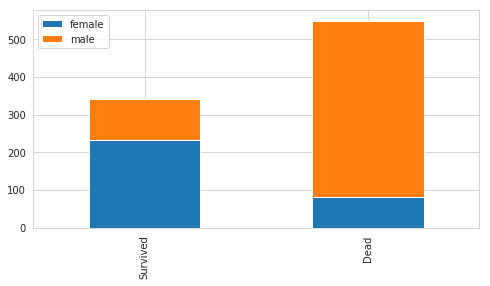

In [89]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

The chart confirms that males have a lesser chance of surviving compared to females. <br>
Prefixes like <b>"Mr."</b>, <b>"Sir."</b> would have lesser chance of survival compared to Prefixes like <b>"Miss."</b>, <b>"Mrs."</b><br>
Any other prefixes like <b>"Rev"</b> or <b>"Dr."</b> can be put into a separate category.<br>

In [90]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [91]:
train["Prefix"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Mme           1
Capt          1
Jonkheer      1
Ms            1
Sir           1
Countess      1
Don           1
Name: Prefix, dtype: int64

## Mapping is defined as :
<ol>
    <li>Mr, Master as 0 
    <li>Miss, Mlle, Ms as 1 
    <li>Mrs, Mme, Lady as 2 
    <li>Others as 3 
</ol>

In [92]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,"Major":3,"Mlle":1,"Col":3,"Capt":3,"Sir":3,"Ms":1,"Lady":3,"Mme":2,"Countess":3,"Jonkheer":3,"Don":3}

In [93]:
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [95]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [96]:
for data in combined_data:
    data.drop(columns = "Name",inplace=True)

In [97]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [98]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


## 2. Cabin Vs Survival :

We first see how many null values are there in the Cabin column of our train data set : 

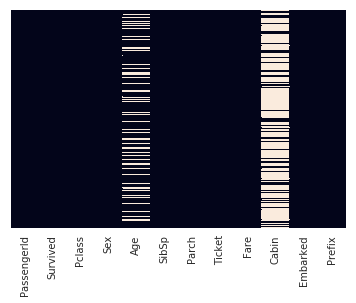

In [99]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [100]:
train["Cabin"].isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

We check to see if having a Cabin number has anything to do with the survivar rate of the passenger: 

In [101]:
train["Cabin"] = train["Cabin"].fillna(0)
for i in range(891):
    if(train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"]=1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,1,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,1,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,0,S,0


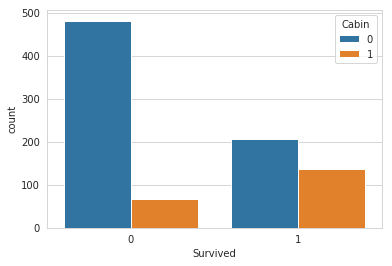

In [102]:
sns.countplot(x = "Survived", hue = "Cabin", data= train)

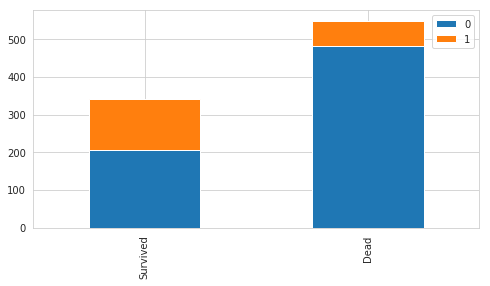

In [103]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))

We can see that Cabin has too many Null values, but most passengers that did not survive also didnt have a cabin number, we can code our data as <br>
<b>Having a Cabin : </b> 1 <br>
<b> Not Having a Cabin : </b> 0

In [104]:
test["Cabin"] = test["Cabin"].fillna(0)
for i in range(417):
    if(test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"]=1


In [105]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,0,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,0,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,0,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,0,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,0,S,2.0


The <b>Cabin</b> column has been encoded.

## 3. Passenger Class Vs Survival Rate :

Let us vizualise the data to see if the class of the passenger impacts the survival rate or not:

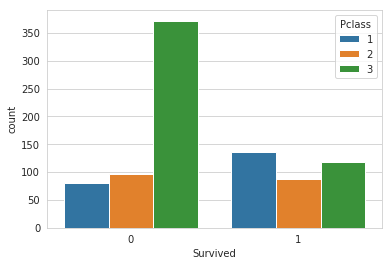

In [106]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

From the bar plot it is clear that the passengers from <b>First Class</b> had a higher chance of surviving. <br>
Majority of the passengers in <b>Third Class</b> did not survive. 
Therefore, Passenger Class is an important factor while predicting the survival rate of the passengers.

## 4. Age
we use data visulaization to see how age influences the survival rate of the passengers : -

We check to see if Age has any null values -

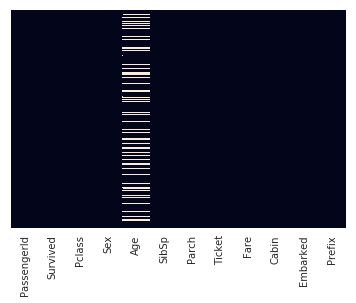

In [107]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

Age has a few null values which should be filled up. <br>
We can fill the null values using the average age of the passengers in each Passenger class.

In [108]:
avg_first = train["Age"][train["Pclass"]==1].mean()
avg_second = train["Age"][train["Pclass"]==2].mean()
avg_third = train["Age"][train["Pclass"]==3].mean()
print("Average age for First class Passenger : ",avg_first)
print("Average age for Second class Passenger : ",avg_second)
print("Average age for Third class Passenger : ",avg_third)

Average age for First class Passenger :  38.233440860215055
Average age for Second class Passenger :  29.87763005780347
Average age for Third class Passenger :  25.14061971830986


In [109]:
for data in combined_data:
    data["Age"] = data["Age"].fillna(0)
    
for i in range(891):
    if(train.at[i,"Age"]==0):
        if(train.at[i,"Pclass"]==1):
            train.at[i,"Age"]=avg_first
        elif(train.at[i,"Pclass"]==2):
            train.at[i,"Age"]=avg_second
        else:
            train.at[i,"Age"]=avg_third
for i in range(418):
    if(test.at[i,"Age"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Age"]=avg_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Age"]=avg_second
        else:
            test.at[i,"Age"]=avg_third

In [110]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Prefix
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.567901
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.826963
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [111]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,417.000000
mean,1100.500000,2.265550,29.555296,0.447368,0.392344,35.627188,0.570743
std,120.810458,0.841838,12.846509,0.896760,0.981429,55.907576,0.814772
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.140620,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


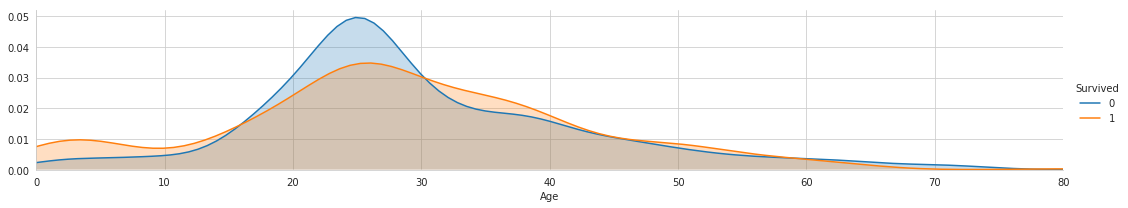

In [115]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()


We look closely at the different age ranges: 

### Age range : 0 - 20

(0, 20)

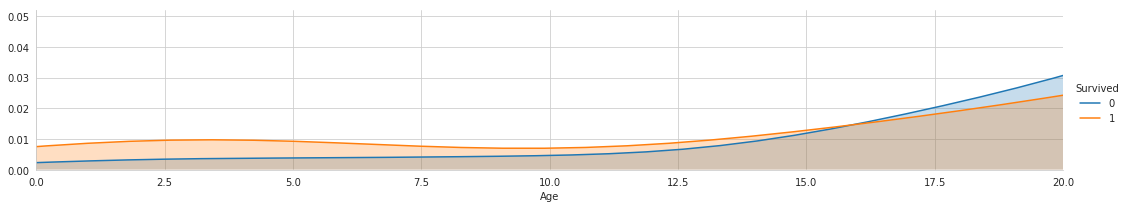

In [118]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(0,20)

### Age range : 20 - 30

(20, 30)

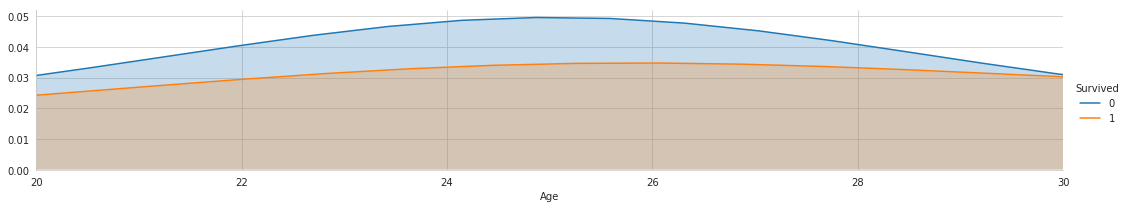

In [120]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(20,30)

### Age range : 30 above

(30, 75)

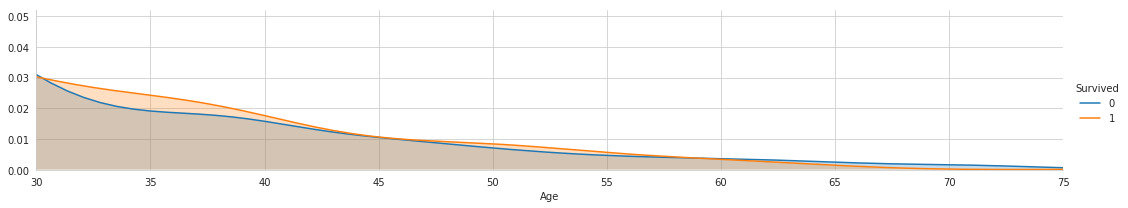

In [123]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()
plt.xlim(30,75)

## Observation : 
1. Younger people, age 0 - 20 are more likely to survive than to die
2. People in the age group of 20 - 30 are more likely to die
3. Older people will more likely survive

In general, the young adult passengers have the highest probablity of dying compard to children and older adults